In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install ultralytics==8.0.184

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 618.0/618.0 kB 13.1 MB/s eta 0:00:00


In [4]:
import os
os.chdir('/content/drive/MyDrive/Data Analyst/Kwater')
os.getcwd()

'/content/drive/MyDrive/Data Analyst/Kwater'

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8m.pt') # yolov8m 모델 불러오기

100%|██████████| 49.7M/49.7M [00:00<00:00, 158MB/s]


In [ ]:
model.train(data = '/content/drive/MyDrive/Data Analyst/Kwater/data.yaml'
            epochs =1000,  # epoch
            patience = 10, # 성능 개선이 안되면 자동 저장후 학습 종료
            imgsz = 640,   # image size
            optimizer = 'Adam'
            )

Ultralytics YOLOv8.0.184 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/Data Analyst/Kwater/data.yaml, epochs=1000, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=tor

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 7])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a64c87c7b80>
fitness: 0.30293621201045273
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.04179,     0.60073,    0.028683,     0.35532,     0.28748,     0.28748,     0.28748,     0.41087])
names: {0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'h', 7: 'i'}
plot: True
results_dict: {'metrics/precision(B)': 0.5773422978443812, 'metrics/recall(B)': 0.4771482890657648, 'metrics/mAP50(B)': 0.44204599820362755, 'metrics/mAP50-95(B)': 0.2874795691000999, 'fitness': 0.30293621201045273}
save_dir: PosixPath('runs/detect/train')
speed: {'preprocess': 0.2667915307734001, 'inference': 7.403695640381443, 'loss': 0.0009383881491337097, 'postprocess': 2.1258427195571827}

In [5]:
# model 평가
from ultralytics import YOLO

best_model = YOLO('/content/drive/MyDrive/Data Analyst/Kwater/runs/detect/train/weights/best.pt')
metrics = best_model.val()

Ultralytics YOLOv8.0.184 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25844392 parameters, 0 gradients
100%|██████████| 755k/755k [00:00<00:00, 27.5MB/s]
val: Scanning /content/drive/MyDrive/Data Analyst/Kwater/Valid/labels.cache... 1045 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1045/1045 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:38<00:00,  1.71it/s]
                   all       1045       1045      0.576      0.478      0.442      0.286
                     a       1045         37     0.0638      0.189     0.0633     0.0425
                     b       1045        824      0.762      0.923      0.856        0.6
                     c       1045        107          1          0     0.0583     0.0285
                     d       1045         45     0.0981      0.933      0.562      0.353
                     i       1045         32    

In [6]:
print(metrics.box.map)   # map50-95 결과
print(metrics.box.map50) # map50 결과
print(metrics.box.maps)  # class별 map50-95

0.28593762309095927
0.4422503287956701
[   0.042452     0.59968    0.028461     0.35271     0.28594     0.28594     0.28594     0.40639]


In [8]:
# 추론
best_model = YOLO('/content/drive/MyDrive/Data Analyst/Kwater/runs/detect/train/weights/best.pt')

image_path = "/content/drive/MyDrive/Data Analyst/Kwater/Test/images/train_73933.png"
results = best_model(image_path)  # 추론 -> 필요할 설정들을 파라미터로 지정.


image 1/1 /content/drive/MyDrive/Data Analyst/Kwater/Test/images/train_73933.png: 480x640 1 b, 1 d, 166.4ms
Speed: 2.2ms preprocess, 166.4ms inference, 2.6ms postprocess per image at shape (1, 3, 480, 640)


In [9]:
print(type(results))     # 추론한 사진별로 결과를 따로 생성한 뒤에 리스트로 묶어준다.
print(len(results))
print(type(results[0]))  # 첫번째 이미지에 대한 결과.

<class 'list'>
1
<class 'ultralytics.engine.results.Results'>


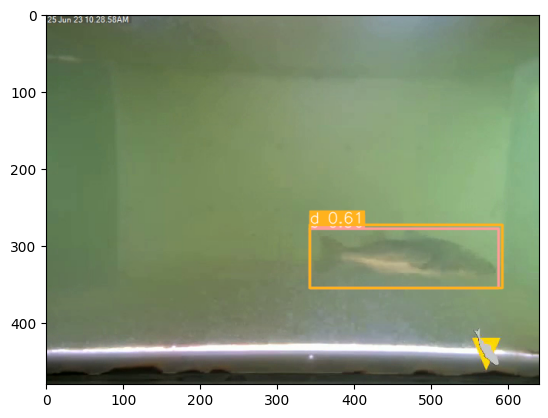

In [10]:
import matplotlib.pyplot as plt
import cv2

plt.imshow(results[0].plot()[:,:,::-1])
#원본이미지에 추론 결과를 표시한 결과 이미지를 반환.(ndarray: bgr모드)
plt.show()

In [21]:
# Object Detection 결과값 조회
boxes = results[0].boxes
type(boxes)

ultralytics.engine.results.Boxes

In [22]:
# 찾은 object 정보
print(boxes.cls.shape) # boxes.cls: object class(index)  => [2] => 찾은 object가 2개. 2개 class
print(boxes.cls)

torch.Size([2])
tensor([3., 1.], device='cuda:0')


In [23]:
# 찾은 object의 class 확률.
print(boxes.conf.shape)
boxes.conf

torch.Size([2])


tensor([0.6076, 0.5636], device='cuda:0')

In [24]:
# bbox 위치 - xywh : center x y좌표, bbox의 너비, 높이
print(boxes.xywh, boxes.xywh.shape, sep="\n")
print(boxes.xywhn, boxes.xywhn.shape, sep="\n")  # xywhn => normalize

tensor([[467.3869, 314.2066, 250.1768,  81.6481],
        [465.2775, 316.9953, 244.6967,  77.0754]], device='cuda:0')
torch.Size([2, 4])
tensor([[0.7303, 0.6546, 0.3909, 0.1701],
        [0.7270, 0.6604, 0.3823, 0.1606]], device='cuda:0')
torch.Size([2, 4])
